In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('../data/2016-08-08-last-year.xz',
                   parse_dates=[16],
                   dtype={'document_id': np.str,
                          'congressperson_id': np.str,
                          'congressperson_document': np.str,
                          'term_id': np.str,
                          'cnpj_cpf': np.str,
                          'reimbursement_number': np.str})

There are 374,484 expenses reimbursed in the past year.

In [3]:
print(data.shape)

(374484, 29)


In [4]:
data.head()

,document_id,congressperson_name,congressperson_id,congressperson_document,term,state,party,term_id,subquota_number,subquota_description,...,net_value,month,year,installment,passenger,leg_of_the_trip,batch_number,reimbursement_number,reimbursement_value,applicant_id
0,5886345,ABEL MESQUITA JR.,178957,1,2015,RR,DEM,55,1,Maintenance of office supporting parliamentary...,...,165.65,11,2015,0,NaN,NaN,1255355,5294,NaN,3074
1,5886361,ABEL MESQUITA JR.,178957,1,2015,RR,DEM,55,1,Maintenance of office supporting parliamentary...,...,59.48,12,2015,0,NaN,NaN,1255361,5294,NaN,3074
2,5886341,ABEL MESQUITA JR.,178957,1,2015,RR,DEM,55,1,Maintenance of office supporting parliamentary...,...,130.95,11,2015,0,NaN,NaN,1255355,5294,NaN,3074
3,5928783,ABEL MESQUITA JR.,178957,1,2015,RR,DEM,55,1,Maintenance of office supporting parliamentary...,...,193.06,12,2015,0,NaN,NaN,1268867,5370,NaN,3074
4,5608486,ABEL MESQUITA JR.,178957,1,2015,RR,DEM,55,1,Maintenance of office supporting parliamentary...,...,310.25,2,2015,0,NaN,NaN,1168538,4966,NaN,3074


In [5]:
data.iloc[0]

document_id                                                             5886345
congressperson_name                                           ABEL MESQUITA JR.
congressperson_id                                                        178957
congressperson_document                                                       1
term                                                                       2015
state                                                                        RR
party                                                                       DEM
term_id                                                                      55
subquota_number                                                               1
subquota_description          Maintenance of office supporting parliamentary...
subquota_group_id                                                             0
subquota_group_description                                                  NaN
supplier                                

In [6]:
def change_type_to_category(column):
    data[column] = data[column].astype('category')

category_columns = ['congressperson_id',
       'state', 'party', 'term_id',
       'subquota_number', 'subquota_group_id',
       'document_type', 'applicant_id']

[change_type_to_category(column) for column in category_columns]; None

Data seems to contain outliers - negative net values and other records in the range of hundreds of thousands of Reais.

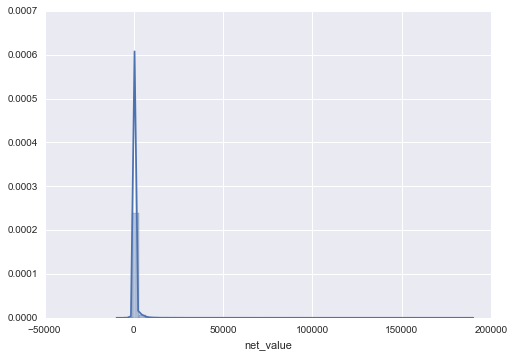

In [7]:
sns.distplot(data['net_value'])

In [8]:
data['net_value'].describe()

count    374484.000000
mean        570.566565
std        1993.167639
min       -9240.770000
25%          45.000000
50%         134.310000
75%         481.000000
max      189600.000000
Name: net_value, dtype: float64

Most expensive document reimbursed by the government: R$189,600.00

In [9]:
data[data['net_value'] == data['net_value'].max()]

,document_id,congressperson_name,congressperson_id,congressperson_document,term,state,party,term_id,subquota_number,subquota_description,...,net_value,month,year,installment,passenger,leg_of_the_trip,batch_number,reimbursement_number,reimbursement_value,applicant_id
32353,5884288,ARNALDO FARIA DE SÁ,73434,337,2015,SP,PTB,55,5,Publicity of parliamentary activity,...,189600.0,12,2015,0,NaN,NaN,1254689,5266,NaN,292


There are negative net_values.

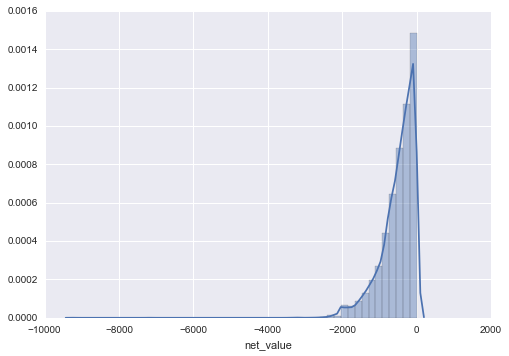

In [10]:
sns.distplot(data.loc[data['net_value'] < 0, 'net_value'])

Let's try to remove outliers.

In [11]:
dist_range = data['net_value'].mean() + data['net_value'].std() * 3 * np.r_[-1, 1]
dist_range

array([-5408.93635177,  6550.069482  ])

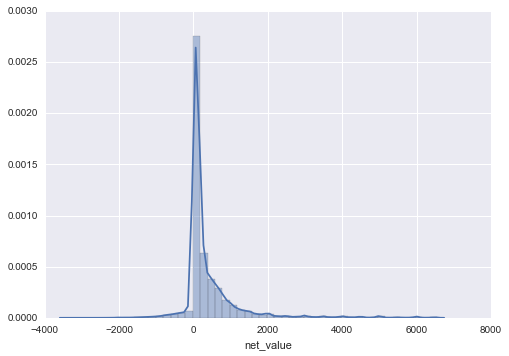

In [12]:
wo_outliers = \
    (data['net_value'] >= dist_range[0]) & (data['net_value'] <= dist_range[1])
data_wo_outliers = data[wo_outliers]
sns.distplot(data_wo_outliers['net_value'])

45% of the dataset have net values larger than 3 standard deviations from the mean. Meaning: tail does not contain just a few outliers, but a good portion of the dataset. Let's study what's in this long tail (greater than 3 stds).

In [13]:
outliers = data[~data.isin(data_wo_outliers)['document_id']]
print(len(outliers), len(outliers) / len(data))

170204 0.4545027290885592


In [14]:
outliers.head()

,document_id,congressperson_name,congressperson_id,congressperson_document,term,state,party,term_id,subquota_number,subquota_description,...,net_value,month,year,installment,passenger,leg_of_the_trip,batch_number,reimbursement_number,reimbursement_value,applicant_id
76,5851959,ABEL MESQUITA JR.,178957,1,2015,RR,DEM,55,4,"Consultancy, research and technical work",...,18000.0,11,2015,0,NaN,NaN,1244585,5242,NaN,3074
77,5887522,ABEL MESQUITA JR.,178957,1,2015,RR,DEM,55,4,"Consultancy, research and technical work",...,18000.0,12,2015,0,NaN,NaN,1255689,5298,NaN,3074
78,5920934,ABEL MESQUITA JR.,178957,1,2015,RR,DEM,55,4,"Consultancy, research and technical work",...,18000.0,12,2015,0,NaN,NaN,1266231,5422,NaN,3074
79,5761747,ABEL MESQUITA JR.,178957,1,2015,RR,DEM,55,4,"Consultancy, research and technical work",...,20000.0,7,2015,0,NaN,NaN,1217319,5124,NaN,3074
80,5793677,ABEL MESQUITA JR.,178957,1,2015,RR,DEM,55,4,"Consultancy, research and technical work",...,20000.0,8,2015,0,NaN,NaN,1226779,5170,NaN,3074


In [15]:
outliers['subquota_description'].describe()

count                  170204
unique                     14
top       Flight ticket issue
freq                   116993
Name: subquota_description, dtype: object

In [16]:
from functools import partial

s_na_mean = partial(pd.Series.mean, skipna = True)
subquota_number_ranking = \
    outliers.groupby('subquota_number', as_index=False).agg({'net_value': np.nansum})

ranking_long_tail = \
    pd.merge(subquota_number_ranking,
             data[['subquota_number', 'subquota_description']].drop_duplicates('subquota_number', keep='first'),
             how='left',
             on='subquota_number').sort_values('net_value', ascending=False)

In [17]:
ranking_long_tail.head()

,subquota_number,net_value,subquota_description
17,999,48229356.25,Flight ticket issue
3,5,34730760.81,Publicity of parliamentary activity
2,4,16952282.42,"Consultancy, research and technical work"
12,120,8362929.39,Automotive vehicle renting or charter
6,10,5103956.53,Telecommunication


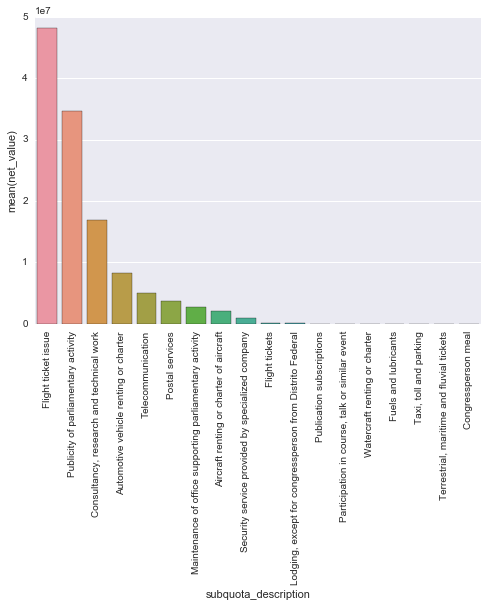

In [18]:
sns.barplot(x='subquota_description',
                    y='net_value',
                    data=ranking_long_tail)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90); None

Let's try to match a document found at http://www.camara.gov.br/cota-parlamentar/index.jsp. Can we generate URLs for the documents received for review?

In [19]:
records = \
    (data['applicant_id'] == 3016) & \
    (data['month'] == 4) & \
    (data['subquota_number'] == 3)
data[records].iloc[0]

document_id                                    5651163
congressperson_name                     ADAIL CARNEIRO
congressperson_id                               178864
congressperson_document                             92
term                                              2015
state                                               CE
party                                               PP
term_id                                             55
subquota_number                                      3
subquota_description              Fuels and lubricants
subquota_group_id                                    1
subquota_group_description        Veículos Automotores
supplier                      BRASAL COMBUSTíVEIS LTDA
cnpj_cpf                                00097626000400
document_number                                 572808
document_type                                        0
issue_date                         2015-04-08 00:00:00
document_value                                     100
remark_val

In [20]:
def document_url(record):
    return 'http://www.camara.gov.br/cota-parlamentar/documentos/publ/%s/%s/%s.pdf' % \
        (record['applicant_id'], record['year'], record['document_id'])

record = data[data['document_number'] == '632604'].iloc[0]
record

document_id                                    5637835
congressperson_name                      ARNALDO JORDY
congressperson_id                               160602
congressperson_document                             18
term                                              2015
state                                               PA
party                                              PPS
term_id                                             55
subquota_number                                      3
subquota_description              Fuels and lubricants
subquota_group_id                                    1
subquota_group_description        Veículos Automotores
supplier                      POSTO SÃO DOMINGOS LTDA.
cnpj_cpf                                63814339000141
document_number                                 632604
document_type                                        0
issue_date                         2015-03-16 00:00:00
document_value                                      20
remark_val

From the document PDF, we could extract new features such as names of the products/services purchased, name of the seller, address of the business among other things.

In [21]:
print(document_url(record))

http://www.camara.gov.br/cota-parlamentar/documentos/publ/2341/2015/5637835.pdf


How about a random record? Is its `document_url` valid? YES!

In [22]:
record = data.sample(random_state=0).iloc[0]
print(document_url(record))
record

http://www.camara.gov.br/cota-parlamentar/documentos/publ/2398/2015/5635048.pdf


document_id                                  5635048
congressperson_name                     SIBÁ MACHADO
congressperson_id                             160613
congressperson_document                           58
term                                            2015
state                                             AC
party                                             PT
term_id                                           55
subquota_number                                   13
subquota_description             Congressperson meal
subquota_group_id                                  0
subquota_group_description                       NaN
supplier                      J. BEZERRA DA CUNHA ME
cnpj_cpf                              04036977000110
document_number                                15283
document_type                                      0
issue_date                       2015-02-28 00:00:00
document_value                                   180
remark_value                                  

Who are these people? There were 803 different applicants last year.

In [23]:
len(data['applicant_id'].unique())

803

In [24]:
applicants_by_net_value = \
    pd.DataFrame(data.groupby(['applicant_id'], as_index=False).sum()[['applicant_id', 'net_value']])
applicants_by_net_value.head()

,applicant_id,net_value
0,19,416089.93
1,74,396689.18
2,80,477709.44
3,84,22762.99
4,98,395691.19


In [25]:
len(applicants_by_net_value)

803

In [26]:
congressperson_list = data[
    ['applicant_id', 'congressperson_name', 'party', 'state']]
congressperson_list = congressperson_list.drop_duplicates('applicant_id', keep='first')

In [27]:
ranking = pd.merge(applicants_by_net_value,
                   congressperson_list,
                   how='left',
                   on='applicant_id').sort_values('net_value', ascending=False)
ranking.head(10)

,applicant_id,net_value,congressperson_name,party,state
450,2333,542411.99,JHONATAN DE JESUS,PRB,RR
250,1818,537204.88,EDIO LOPES,PR,RR
216,1703,520499.10,WELLINGTON ROBERTO,PR,PB
404,2280,516710.27,VINICIUS GURGEL,PR,AP
117,1289,513407.27,NILTON CAPIXABA,PTB,RO
545,2473,510808.79,MARCOS ROGÉRIO,DEM,RO
456,2341,508400.84,ARNALDO JORDY,PPS,PA
508,2398,506268.40,SIBÁ MACHADO,PT,AC
666,2969,504966.44,SHÉRIDAN,PSDB,RR
286,1881,501329.70,MANOEL JUNIOR,PMDB,PB


In [28]:
ranking['net_value'].describe()

count       803.000000
mean     266087.234832
std      189000.038242
min       -1791.570000
25%       33621.015000
50%      362625.870000
75%      429826.050000
max      542411.990000
Name: net_value, dtype: float64

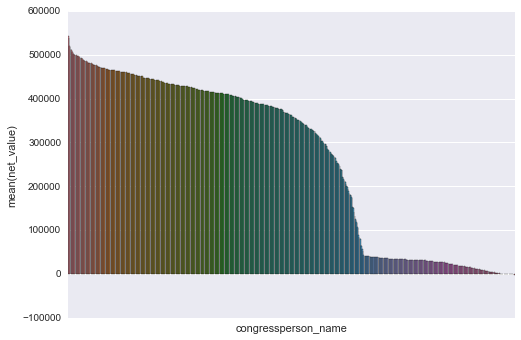

In [29]:
graph = sns.barplot(x='congressperson_name',
                    y='net_value',
                    data=ranking)
graph.axes.get_xaxis().set_ticks([]); None

In [30]:
def x_label_generator(record):
    return '(%s) %s - %s' % (record['party'], record['congressperson_name'], record['state'])

ranking['x_label'] = ranking.apply(x_label_generator, axis=1)

Apparently, politicians from states further away from Distrito Federal expent more. We could perform an analysis on distance to the capital and the home state from the politician.

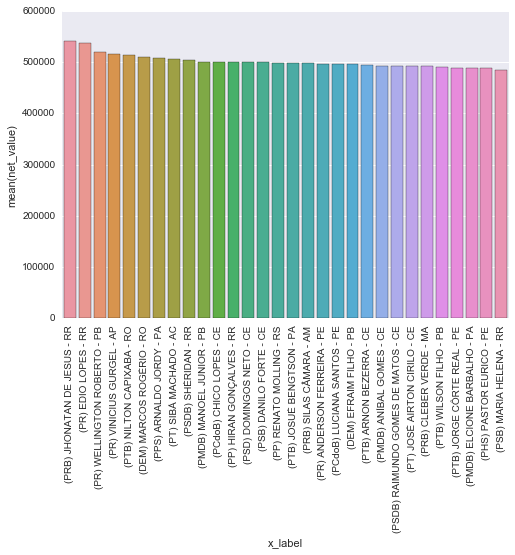

In [31]:
sns.barplot(x='x_label',
            y='net_value',
            data=ranking.head(30))
locs, labels = plt.xticks()
plt.setp(labels, rotation=90); None

In [32]:
# empty cpf/cnpj for foreign expenses